# Alicja Misiuda 26.06.2024

In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

First, it is necessary to create the spectrograms.

In [6]:
# Load in sounds
flute, sr_flute = librosa.load('flute.wav')
violin, sr_violin = librosa.load('violin.wav')
print(sr_flute, "sr_flute sampling rate")
print(sr_violin, "sr_violin sampling rate")

22050 sr_flute sampling rate
22050 sr_violin sampling rate


In [7]:
# Process signal with stft
def to_decibles(signal):
    # stft with abs value
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D 

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + instrument)
    fig.colorbar(spec)

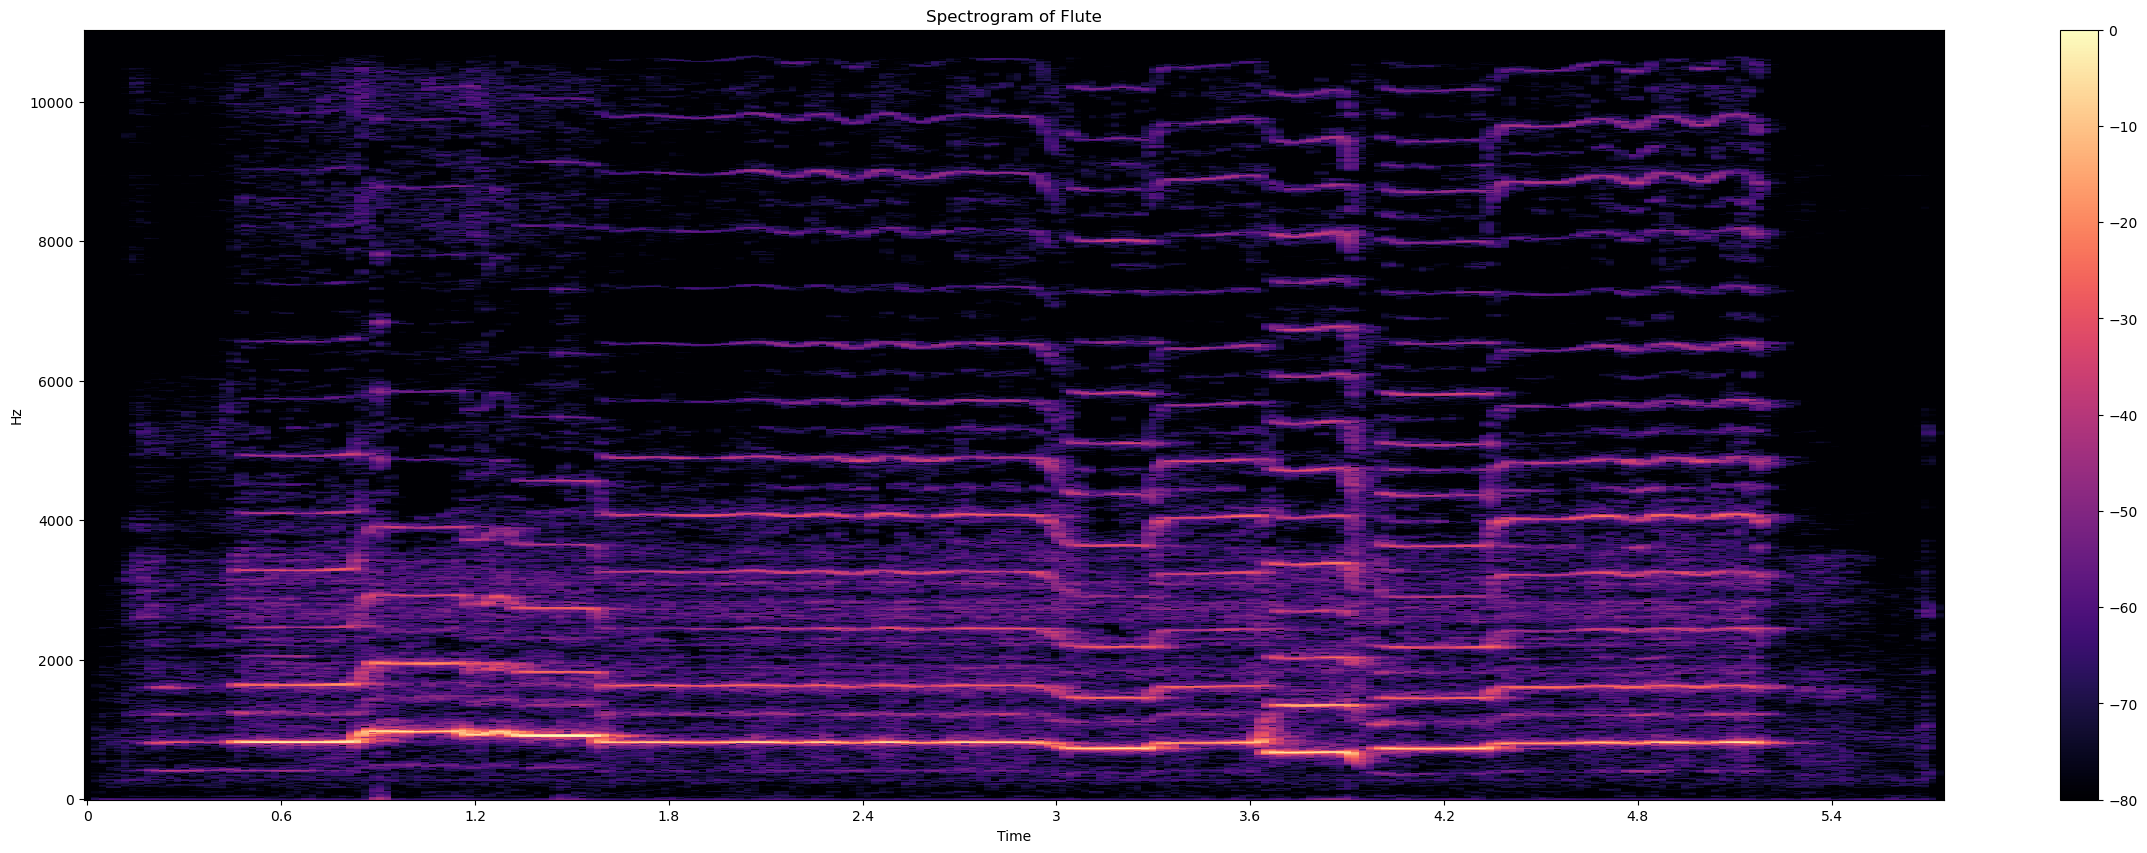

In [21]:
plot_spec(to_decibles(flute), sr_flute, 'Flute')
plt.savefig("out_flute.png")

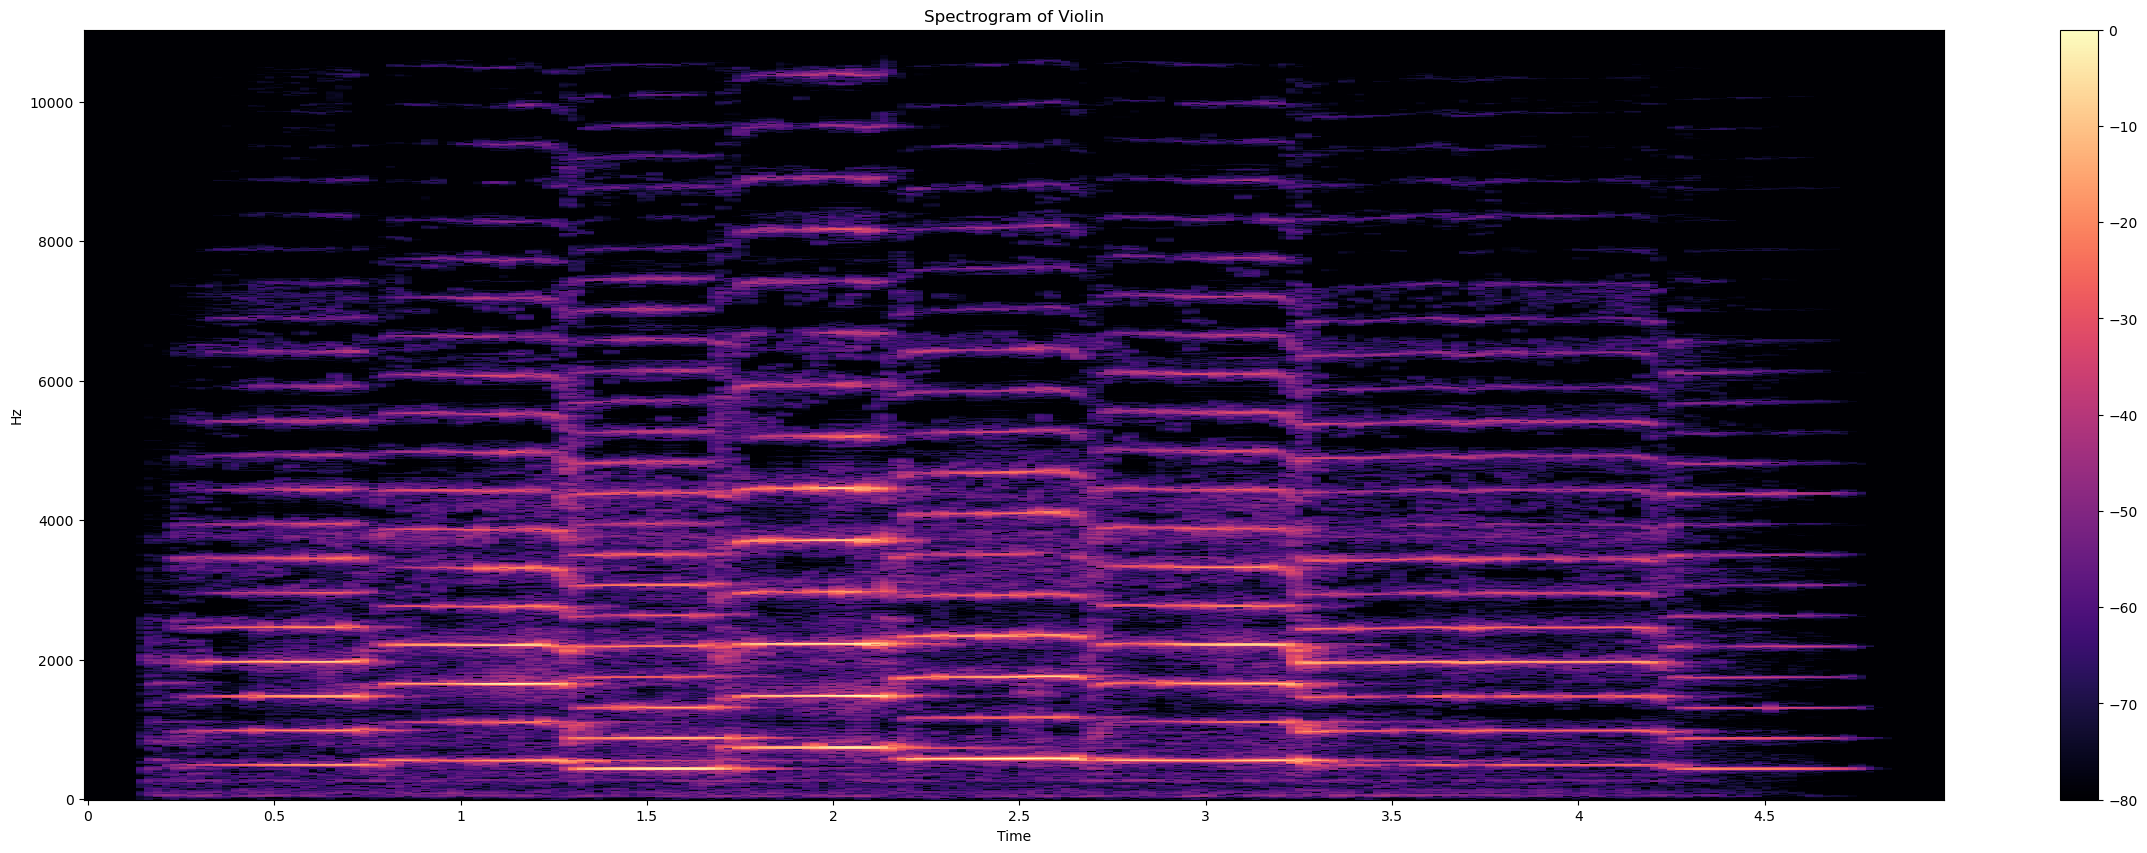

In [22]:
plot_spec(to_decibles(violin), sr_violin, 'Violin')

Creating a complex spectrogram and inversing with stft

In [26]:
# MAGNITUDE AND PHASE (FASTER)
# Load audio file
file = 'flute.wav'
sig, fs = librosa.load(file, sr=sr_flute)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Magnitude and phase
magnitude = np.abs(D)
phase = np.angle(D)

# Reconstruct the complex spectrogram
complex_spectrogram = magnitude * np.exp(1j * phase)

# Inverse STFT
reconstructed_signal = librosa.istft(complex_spectrogram)

print(reconstructed_signal)
print("reconstructed signal shape: ", reconstructed_signal.shape)

# Write the reconstructed audio signal to a file using soundfile
#sf.write('test3.wav', reconstructed_signal, fs)

[-9.2654856e-11 -2.3753565e-11 -7.7895823e-12 ... -5.0962012e-11
 -2.6533576e-11 -3.5156038e-12]
reconstructed signal shape:  (126464,)


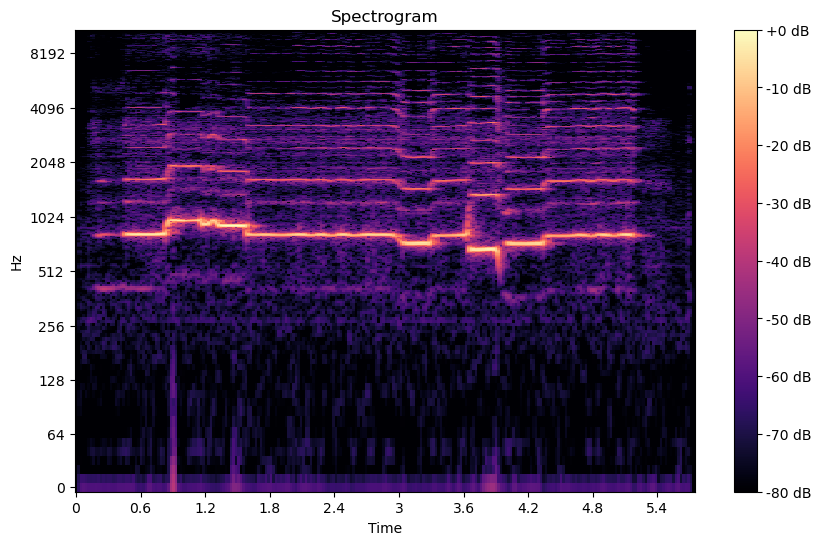

In [27]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load an example audio file
file = 'flute.wav'
sig, sr = librosa.load(file, sr=22050)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Convert the amplitude to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [30]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

# Load an example audio file
file = 'flute.wav'
sig, sr = librosa.load(file, sr=22050)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Convert the amplitude to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram with adjusted parameters
plt.figure(figsize=(6, 3))  # Larger figure size
plt.imshow(D_db, aspect='auto', origin='lower', cmap='magma')  # Using viridis colormap
plt.axis('off')  # Turn off axis
plt.tight_layout()

# Save the plot as an image with higher DPI
plt.savefig('spectrogram_highres.png', bbox_inches='tight', pad_inches=0, dpi=600)  # Higher DPI
plt.close()


Plotting using Mel Spectrograms

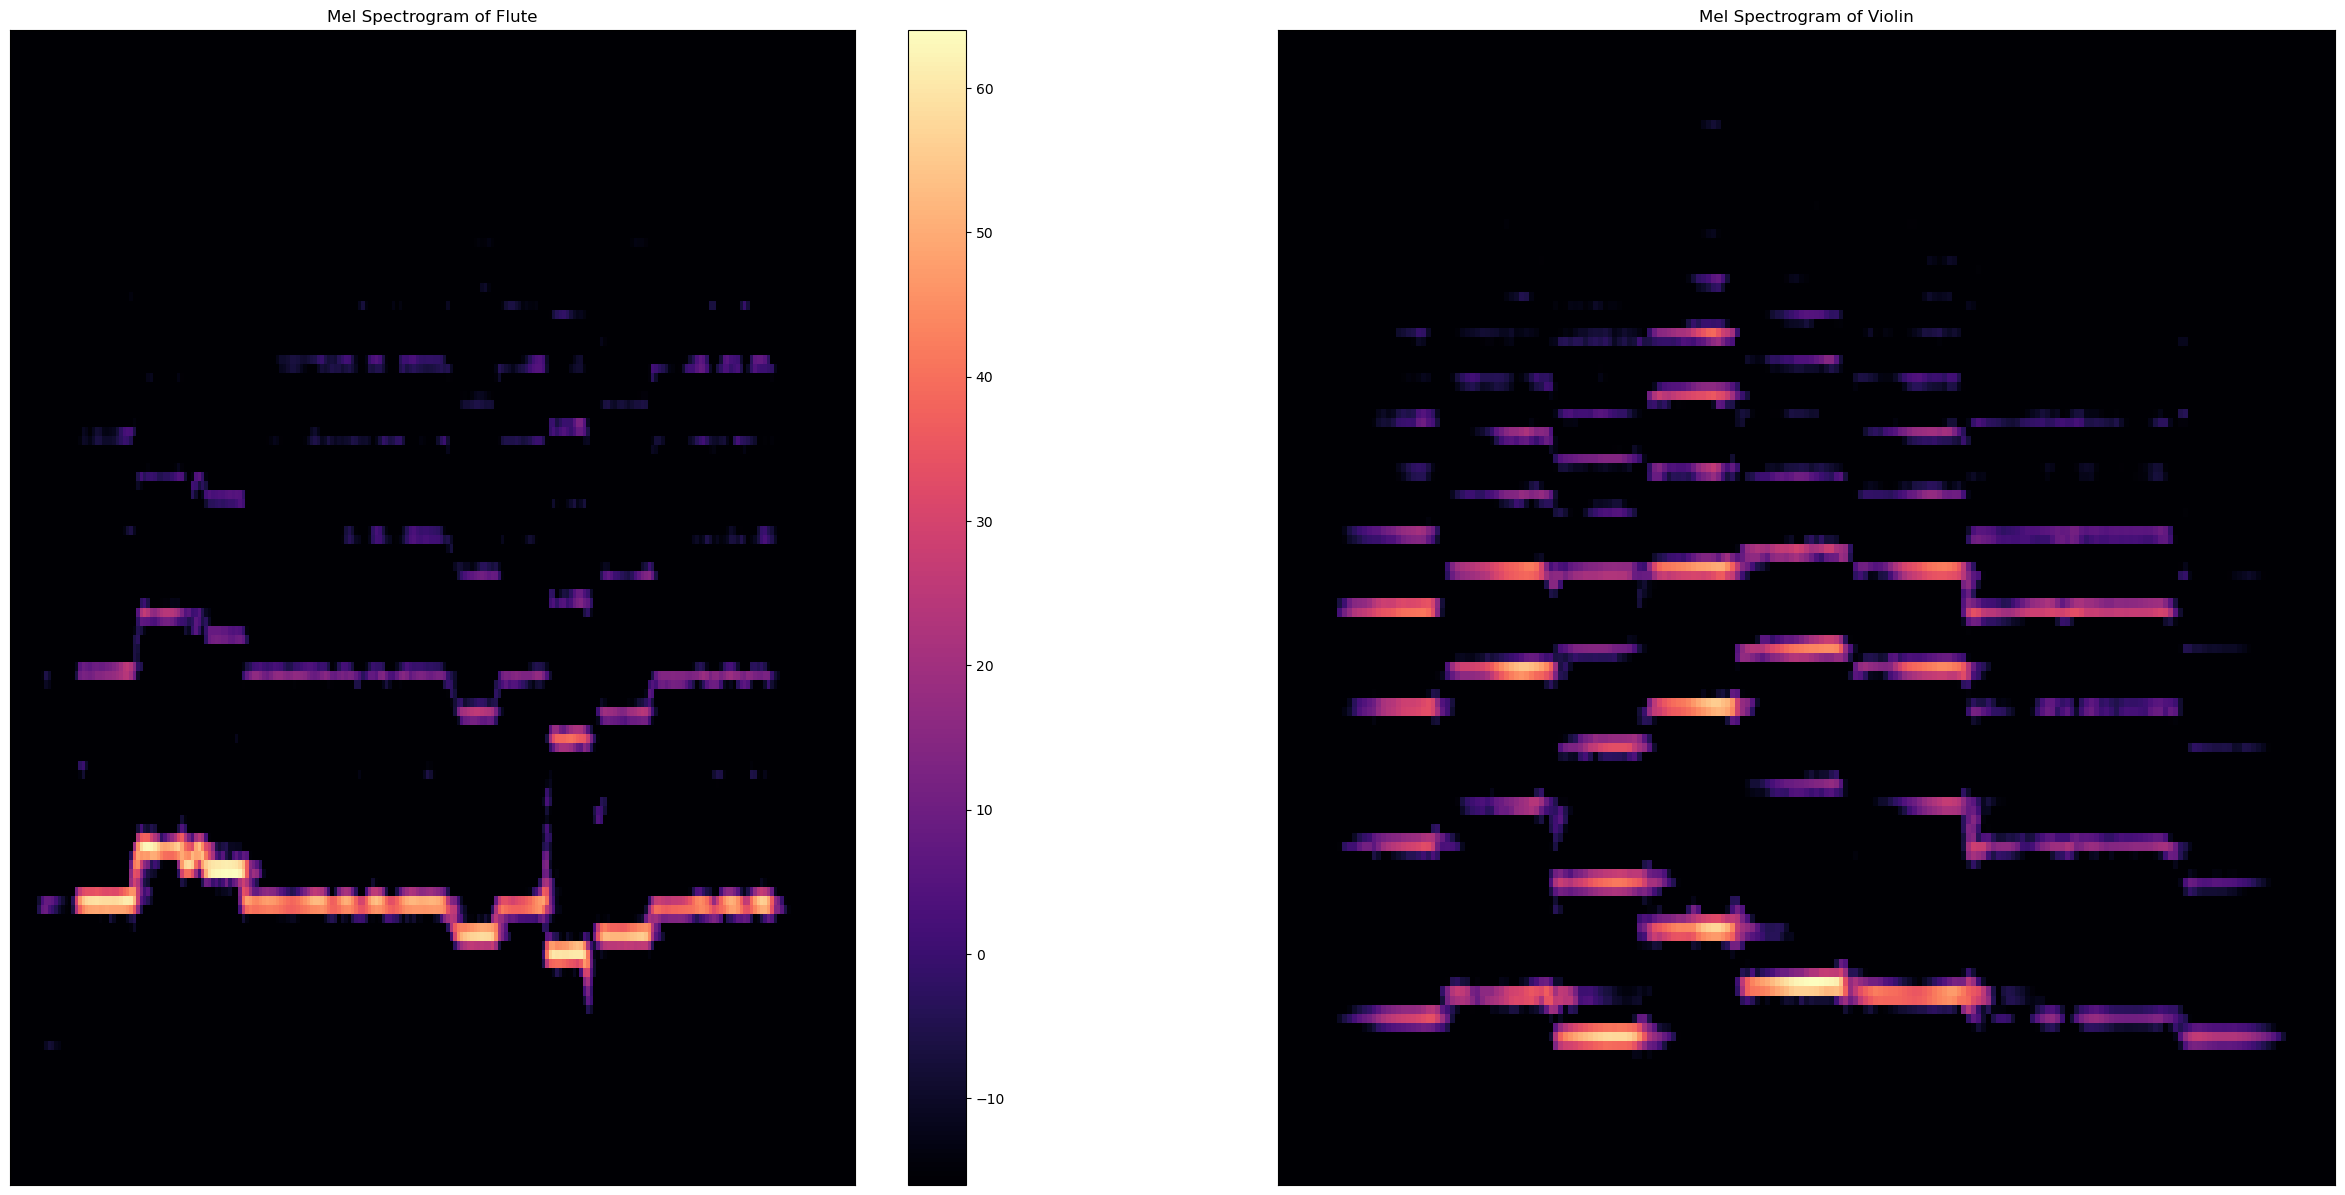

In [31]:
# Create Mel Spectrograms of sounds
fluteSpec = librosa.feature.melspectrogram(y=flute, sr=sr_flute)
violinSpec = librosa.feature.melspectrogram(y=violin, sr=sr_violin)

# Convert amplitudes to dB
fluteSpec = librosa.amplitude_to_db(fluteSpec)
violinSpec = librosa.amplitude_to_db(violinSpec)

# Plot mel spectrograms
fig, ax = plt.subplots(1,2, figsize = (30,15))
ax[0].set(title = 'Mel Spectrogram of Flute')
i = librosa.display.specshow(fluteSpec, ax=ax[0], cmap = 'magma')
ax[1].set(title = 'Mel Spectrogram of Violin')
librosa.display.specshow(violinSpec, ax=ax[1], cmap = 'magma')
plt.colorbar(i)

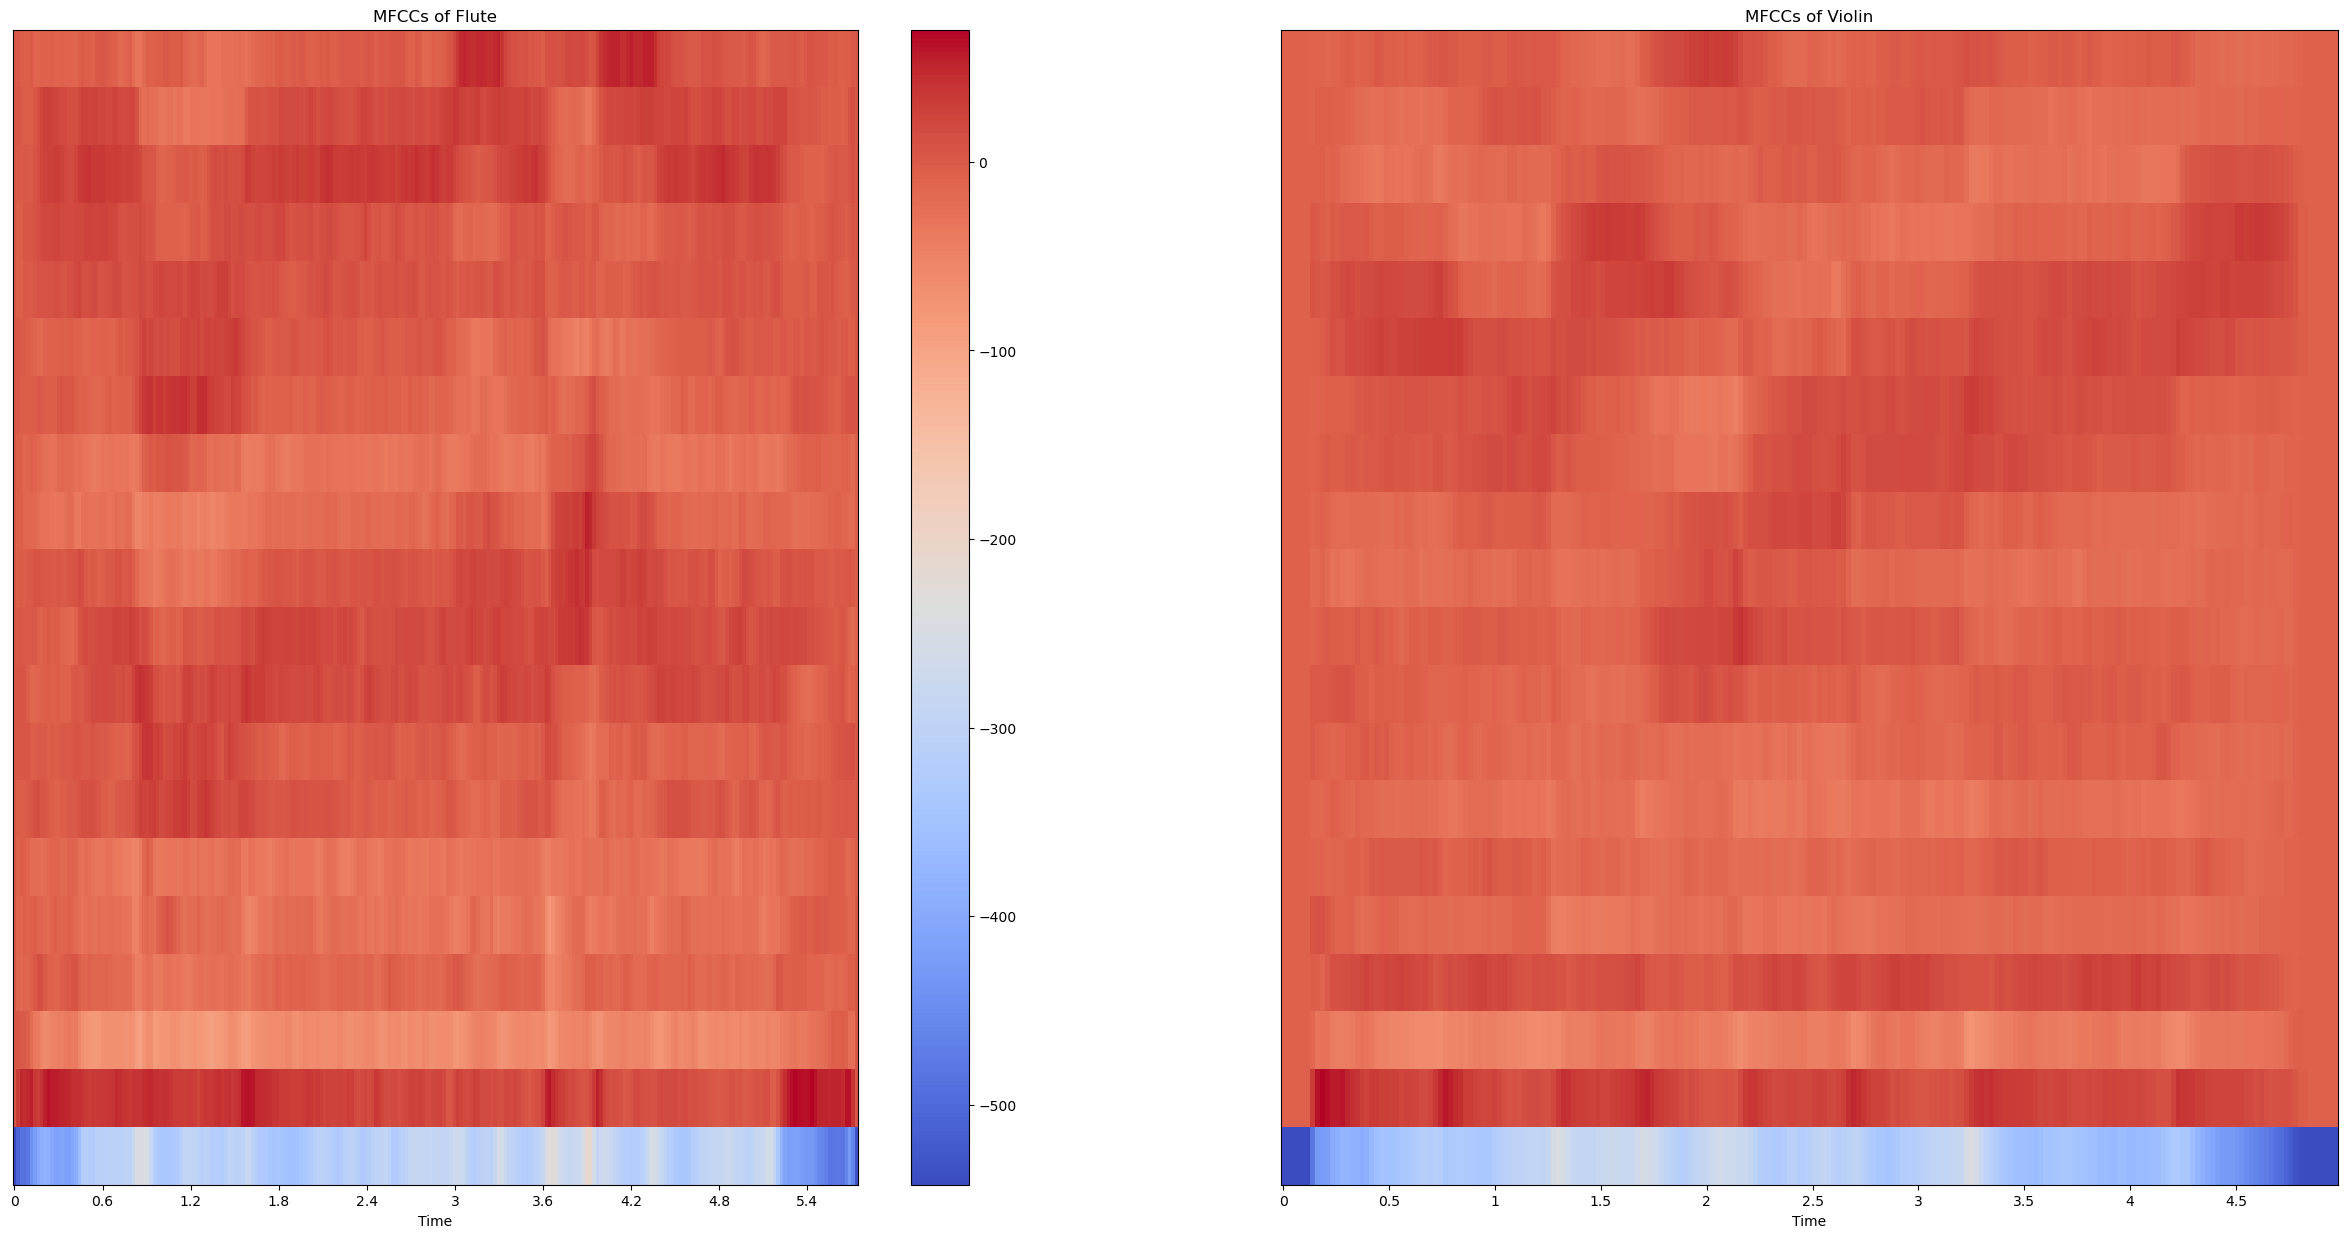

In [30]:
# Take MFCCs of sounds:
fluteMFCC = librosa.feature.mfcc(y=flute, sr=sr_flute)
violinMFCC = librosa.feature.mfcc(y=violin, sr=sr_violin)

# Plot MFCCs
fig, ax = plt.subplots(1,2, figsize = (30,15))
ax[0].set(title = 'MFCCs of Flute')
i = librosa.display.specshow(fluteMFCC, x_axis='time', ax=ax[0])
ax[1].set(title = 'MFCCs of Violin')
librosa.display.specshow(violinMFCC, x_axis='time', ax=ax[1])
plt.colorbar(i)